In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy import sparse

%matplotlib inline

# Лабораторная работа 3 #

## Методы решения нелинейных уравнений и нелинейных систем уравнений ##

### Рассматриваемое нелинейное уравнение ###
**е)** $x^2 - 20\sin{x} = 0$

### Рассматриваемая система нелинейных уравнений ###
**б)** $\begin{align}
    \begin{cases}
        \tan{(xy + 0.4)} = x^2 \\
        0.6 x^2 + 2y^2 = 1 \\
    \end{cases}
\end{align}$

## Решение нелинейного уравнения ##

### Метод половинного деления ###

Метод половинного деления используется для нахождения корней уравнения. Для его применения необходимо найти отрезок $[a, b]$, на котором функция меняет знак.
Уравнение $x^2 - 20\sin{x} = 0$ имеет ненулевой корень на отрезке $[2.5, 3.0]$:

Метод половинного деления для уравнения x² - 20sin(x) = 0
Положительный корень [2.5, 3.0]: x = 2.7529466152, r = 4.47e-07


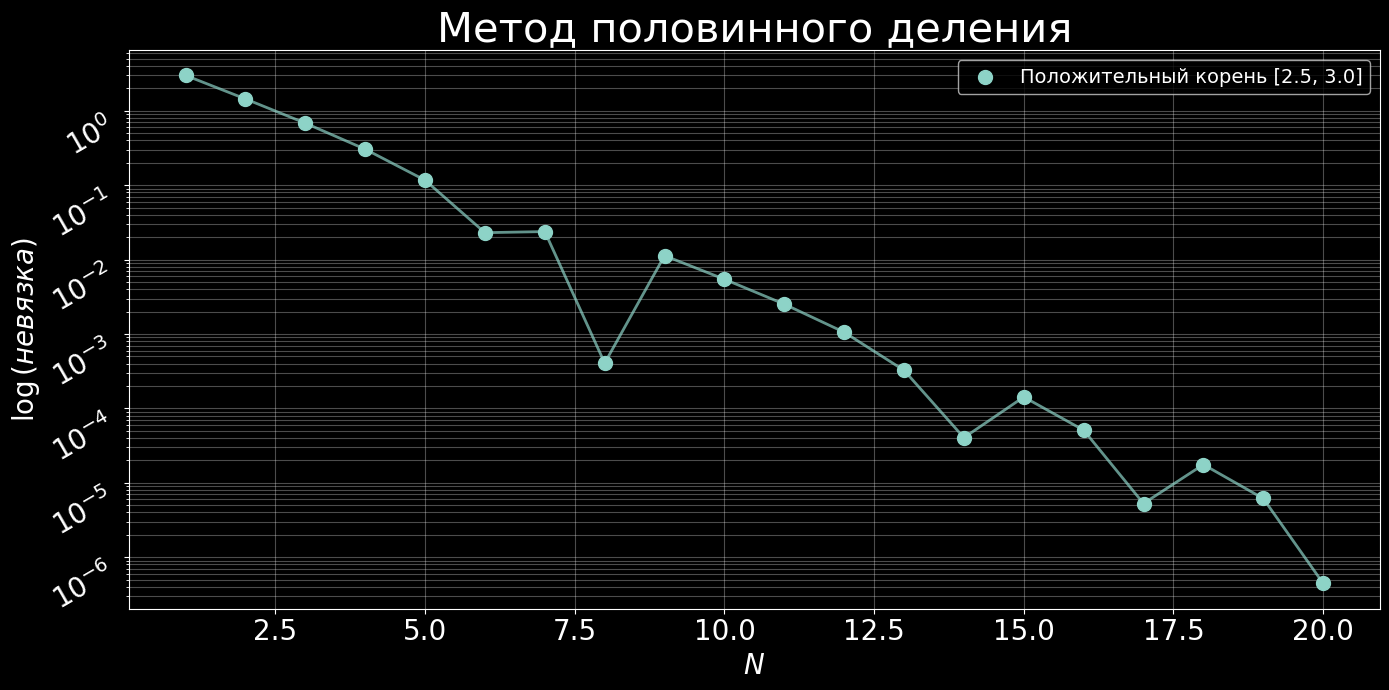

In [16]:
class Bisection_Equation:
    def __init__(self, f, n, tol=1e-12):
        self.f = f
        self.n = n
        self.tol = tol

    def __call__(self, a, b):
        fa = self.f(a)
        fb = self.f(b)

        if fa * fb > 0:
            return None

        for i in range(self.n):
            c = (a + b) / 2
            fc = self.f(c)

            if abs(fc) < self.tol:
                return c

            if fa * fc < 0:
                b = c
                fb = fc
            else:
                a = c
                fa = fc

        return (a + b) / 2

def g(x):
    return x**2 - 20 * np.sin(x)

print("Метод половинного деления для уравнения x² - 20sin(x) = 0")

residuals_zero = []
residuals_pos = []
iterations_bisection = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Метод половинного деления", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(невязка)}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

for i in range(1, iterations_bisection.size + 1):
    bisection = Bisection_Equation(g, i)
    root = bisection(0, 0.5)
    if root is not None:
        residuals_zero.append(np.abs(g(root)))
    else:
        residuals_zero.append(np.nan)

    last_root = Bisection_Equation(g, 20)(0, 0.5)

for i in range(1, iterations_bisection.size + 1):
    bisection = Bisection_Equation(g, i)
    root = bisection(2.5, 3.0)
    if root is not None:
        residuals_pos.append(np.abs(g(root)))
    else:
        residuals_pos.append(np.nan)

valid_indices_pos = ~np.isnan(residuals_pos)
if np.any(valid_indices_pos):
    plt.scatter(iterations_bisection[valid_indices_pos],
               np.array(residuals_pos)[valid_indices_pos],
               s=100, label="Положительный корень [2.5, 3.0]", zorder=5)
    plt.plot(iterations_bisection[valid_indices_pos],
            np.array(residuals_pos)[valid_indices_pos],
            linewidth=2, alpha=0.7, zorder=4)

    last_root = Bisection_Equation(g, 20)(2.5, 3.0)
    if last_root is not None:
        print(f"Положительный корень [2.5, 3.0]: x = {last_root:.10f}, r = {np.abs(g(last_root)):.2e}")

plt.legend(loc="best", fontsize=14)
plt.tight_layout()

### Метод простой итерации ###

Из уравнения следует, что $|x| \leq 2\sqrt{5} \approx 4.47$. При этом $20\sin{\left(-\frac{3\pi}{2}\right)} < 22.2 < \left(\frac{3\pi}{2}\right)^2$ $\Rightarrow$ $|x| \geq 0$.

Заметим, что $x = 0$ – корень уравнения. Второй корень лежит в диапазоне $x \in [2.5, 3]$. Зная это, построим МПИ.

$ x^2 - 20\sin{x} = 0 \Leftrightarrow x_{n+1} = f(x_n) = \pi - \arcsin{\frac{x_n^2}{20}}$

$|f'(x_n)| = \frac{2x}{\sqrt{400 - x^4}} \in [0.25, 0.31]$, $x \in [2.5, 3]$. Значит, МПИ сходится.

x_0 = 2.7 => корень: 2.7529466338
x_0 = 3 => корень: 2.7529466338
x_0 = 0.5 => корень: 0.0000000000
x_0 = 0.1 => корень: 0.0000000000


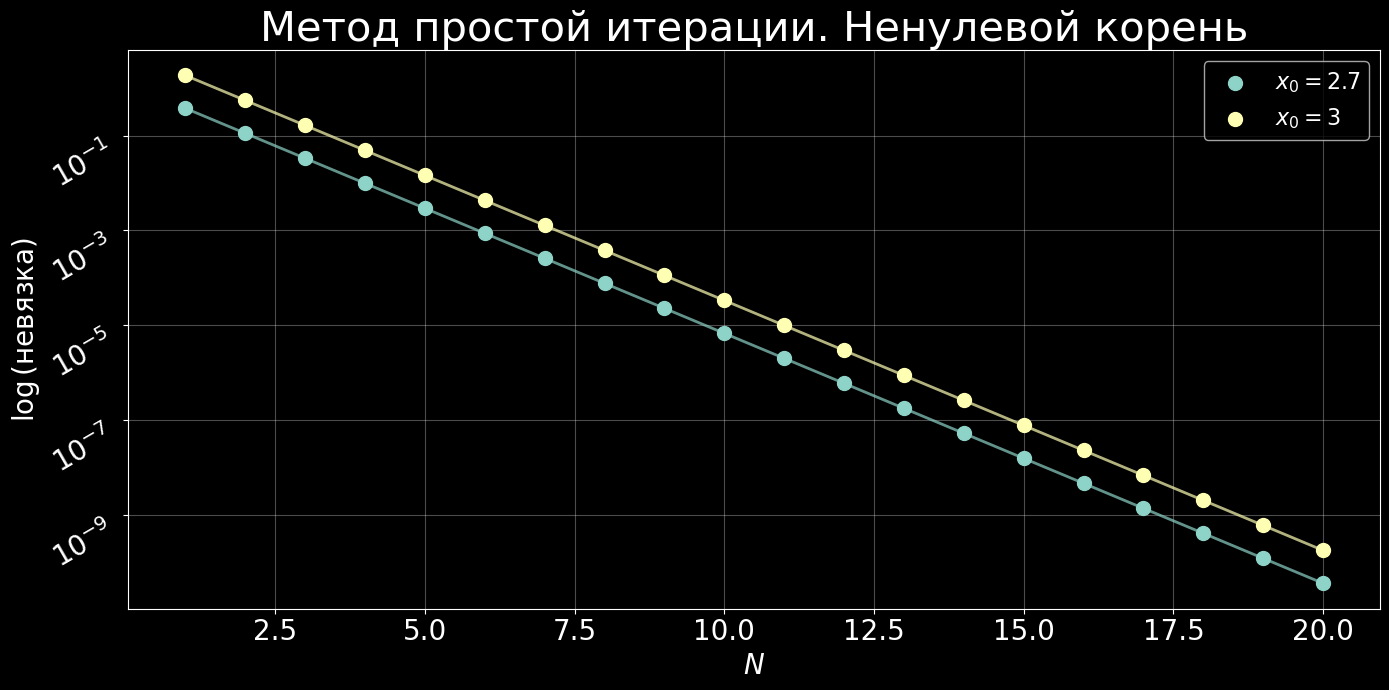

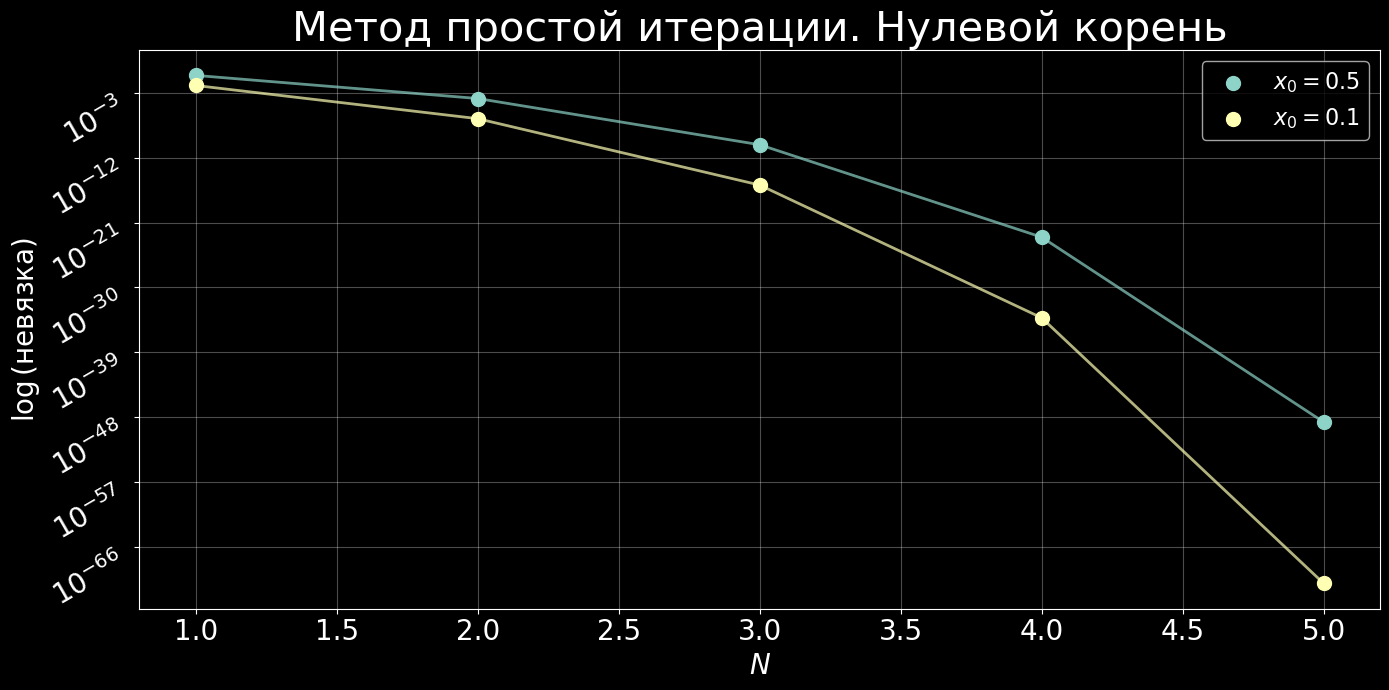

In [20]:
def f(x):
    return np.pi - np.arcsin(x**2 / 20)

class Fixed_Point_Iteration_Equation:
    def __init__(self, f, n):
        self.f = f
        self.n = n

    def __call__(self, x_0):
        x = x_0
        for i in range(self.n):
            x = self.f(x)
        return x

def f1(x):
    return np.arcsin(x**2 / 20)

residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Метод простой итерации. Ненулевой корень", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

for i in range(1, iterations.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f, i)
    root = fpie(2.7)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, s=100, label="$x_0 = 2.7$", zorder=5)
plt.plot(iterations, residuals, linewidth=2, alpha=0.7, zorder=4)

residuals.clear()

for i in range(1, iterations.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f, i)
    root = fpie(3)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, s=100, label="$x_0 = 3$", zorder=5)
plt.plot(iterations, residuals, linewidth=2, alpha=0.7, zorder=4)

plt.legend(loc="best", fontsize=16)
plt.tight_layout()

print(f"x_0 = 2.7 => корень: {root:.10f}")
print(f"x_0 = 3 => корень: {root:.10f}")

residuals.clear()
iterations_zero = np.arange(1, 6)

plt.figure(figsize=[14, 7])
plt.title("Метод простой итерации. Нулевой корень", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

for i in range(1, iterations_zero.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f1, i)
    root = fpie(0.5)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations_zero, residuals, s=100, label="$x_0 = 0.5$", zorder=5)
plt.plot(iterations_zero, residuals, linewidth=2, alpha=0.7, zorder=4)

print(f"x_0 = 0.5 => корень: {root:.10f}")

residuals.clear()

for i in range(1, iterations_zero.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f1, i)
    root = fpie(0.1)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations_zero, residuals, s=100, label="$x_0 = 0.1$", zorder=5)
plt.plot(iterations_zero, residuals, linewidth=2, alpha=0.7, zorder=4)

plt.legend(loc="best", fontsize=16)
plt.tight_layout()

print(f"x_0 = 0.1 => корень: {root:.10f}")

### Метод Ньютона

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

x_0 = 3 => корень: 2.7529466338
x_0 = 2.8 => корень: 2.7529466338
x_0 = 0.5 => корень: -0.0000000000
x_0 = 0.1 => корень: 0.0000000000


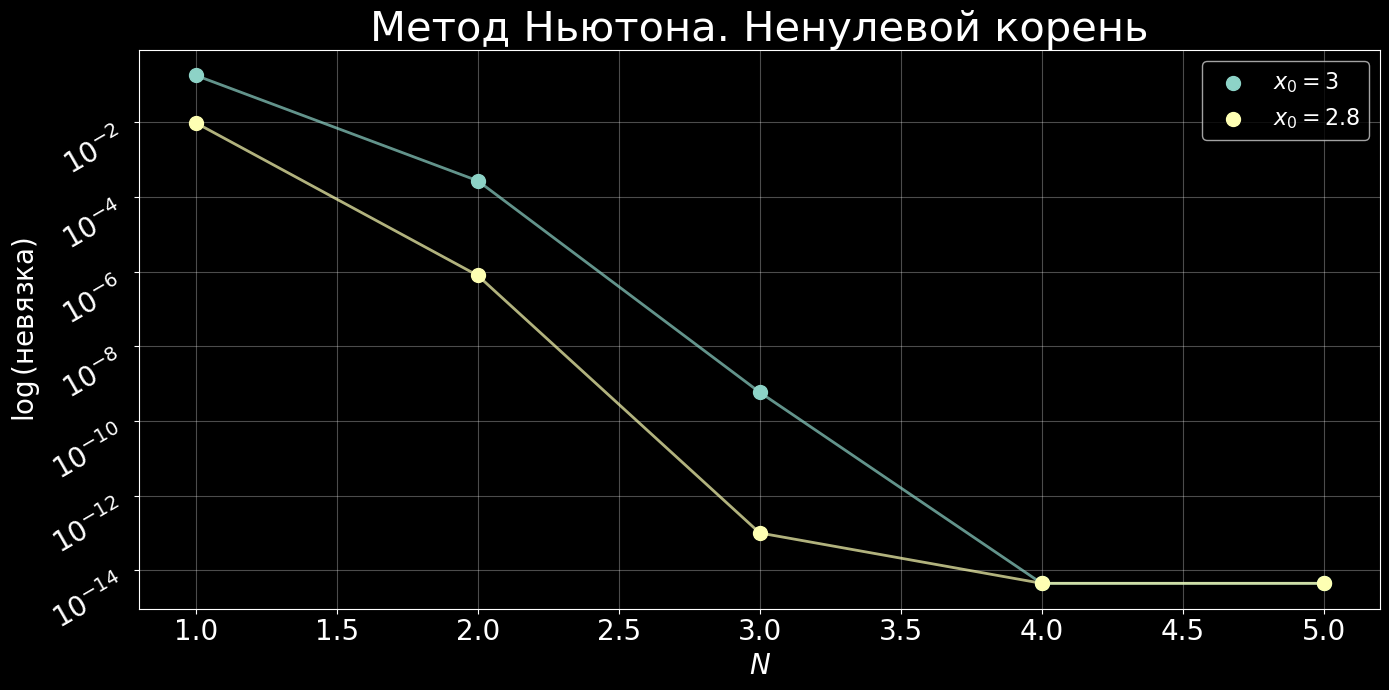

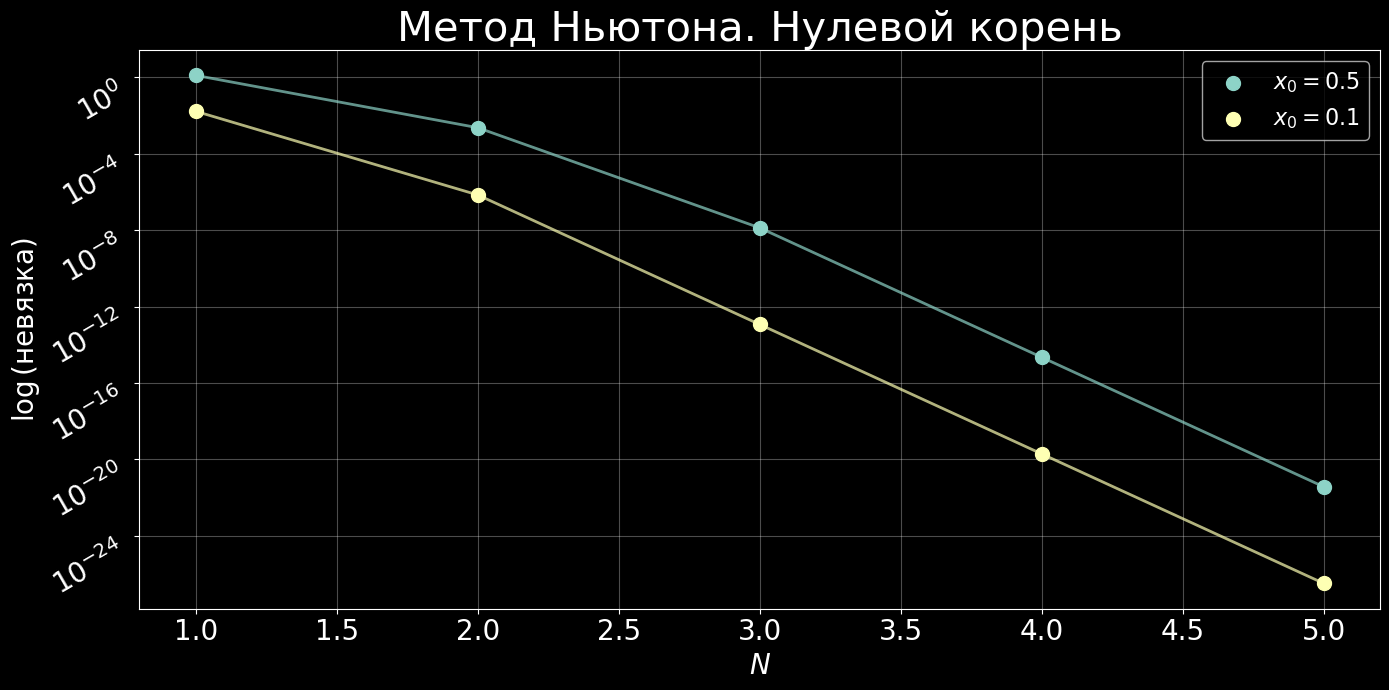

In [22]:
def num_deriv(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

class Newton_Equation:
    def __init__(self, f, n):
        self.f = f
        self.n = n

    def __call__(self, x_0):
        x = x_0
        for i in range(self.n):
            x = x - (self.f(x) / num_deriv(self.f, x, 1e-3))
        return x

residuals_newton = []
iterations_newton = np.arange(1, 6)

plt.figure(figsize=[14, 7])
plt.title("Метод Ньютона. Ненулевой корень", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

for i in range(1, iterations_newton.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(3)
    residuals_newton.append(np.abs(g(root)))

plt.scatter(iterations_newton, residuals_newton, s=100, label="$x_0 = 3$", zorder=5)
plt.plot(iterations_newton, residuals_newton, linewidth=2, alpha=0.7, zorder=4)

print(f"x_0 = 3 => корень: {root:.10f}")

residuals_newton.clear()

for i in range(1, iterations_newton.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(2.8)
    residuals_newton.append(np.abs(g(root)))

plt.scatter(iterations_newton, residuals_newton, s=100, label="$x_0 = 2.8$", zorder=5)
plt.plot(iterations_newton, residuals_newton, linewidth=2, alpha=0.7, zorder=4)

plt.legend(loc="best", fontsize=16)
plt.tight_layout()

print(f"x_0 = 2.8 => корень: {root:.10f}")

residuals_newton_zero = []
iterations_newton_zero = np.arange(1, 6)

plt.figure(figsize=[14, 7])
plt.title("Метод Ньютона. Нулевой корень", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

for i in range(1, iterations_newton_zero.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(0.5)
    residuals_newton_zero.append(np.abs(g(root)))

plt.scatter(iterations_newton_zero, residuals_newton_zero, s=100, label="$x_0 = 0.5$", zorder=5)
plt.plot(iterations_newton_zero, residuals_newton_zero, linewidth=2, alpha=0.7, zorder=4)

print(f"x_0 = 0.5 => корень: {root:.10f}")

residuals_newton_zero.clear()

for i in range(1, iterations_newton_zero.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(0.1)
    residuals_newton_zero.append(np.abs(g(root)))

plt.scatter(iterations_newton_zero, residuals_newton_zero, s=100, label="$x_0 = 0.1$", zorder=5)
plt.plot(iterations_newton_zero, residuals_newton_zero, linewidth=2, alpha=0.7, zorder=4)

plt.legend(loc="best", fontsize=16)
plt.tight_layout()

print(f"x_0 = 0.1 => корень: {root:.10f}")

### Модифицированный метод Ньютона

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_0)}$

x_0 = 3.0 => корень: 2.7529466338, невязка: 6.51e-12
x_0 = 0.5 => корень: 0.0000000480, невязка: 9.60e-07


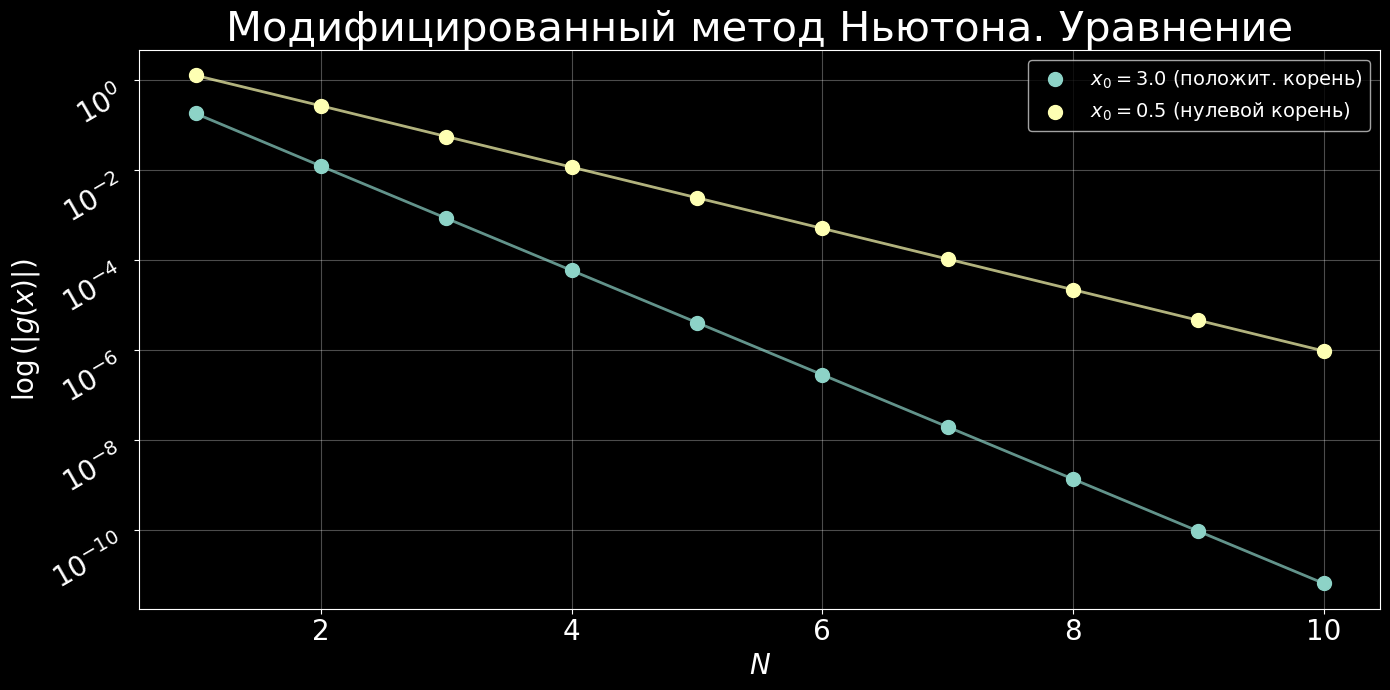

In [24]:
def g(x):
    return x**2 - 20 * np.sin(x)

def num_deriv(f, x, h=1e-6):
    return (f(x + h) - f(x - h)) / (2 * h)

class ModifiedNewtonTangent_Equation:
    def __init__(self, f, n):
        self.f = f
        self.n = n

    def __call__(self, x0):
        f_prime_x0 = num_deriv(self.f, x0)
        x = x0

        for i in range(self.n):
            fx = self.f(x)
            x = x - fx / f_prime_x0

        return x

residuals_mod_newton = []
iterations_mod_newton = np.arange(1, 11)
plt.style.use('dark_background')

plt.figure(figsize=[14, 7])
plt.title("Модифицированный метод Ньютона. Уравнение", fontsize=30)
plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(|g(x)|)}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

for i in range(1, iterations_mod_newton.size + 1):
    mod_newton = ModifiedNewtonTangent_Equation(g, i)
    root = mod_newton(3.0)
    residuals_mod_newton.append(np.abs(g(root)))

plt.scatter(iterations_mod_newton, residuals_mod_newton, s=100,
           label="$x_0 = 3.0$ (положит. корень)", zorder=5)
plt.plot(iterations_mod_newton, residuals_mod_newton, linewidth=2, alpha=0.7, zorder=4)
print(f"x_0 = 3.0 => корень: {root:.10f}, невязка: {np.abs(g(root)):.2e}")

residuals_mod_newton_zero = []
for i in range(1, iterations_mod_newton.size + 1):
    mod_newton = ModifiedNewtonTangent_Equation(g, i)
    root = mod_newton(0.5)
    residuals_mod_newton_zero.append(np.abs(g(root)))

plt.scatter(iterations_mod_newton, residuals_mod_newton_zero, s=100,
           label="$x_0 = 0.5$ (нулевой корень)", zorder=5)
plt.plot(iterations_mod_newton, residuals_mod_newton_zero, linewidth=2, alpha=0.7, zorder=4)
plt.legend(loc="best", fontsize=14)
plt.tight_layout()
print(f"x_0 = 0.5 => корень: {root:.10f}, невязка: {np.abs(g(root)):.2e}")

## Решение нелинейной системы
### Метод половинного деления

Область 1 => x: 1.046227, y: 0.414270, невязка: 6.39e-03
Область 2 => x: 0.378932, y: -0.679119, невязка: 8.61e-03
Область 3 => x: -1.048400, y: -0.412622, невязка: 6.03e-08
Область 4 => x: -0.381180, y: 0.675336, невязка: 2.41e-03


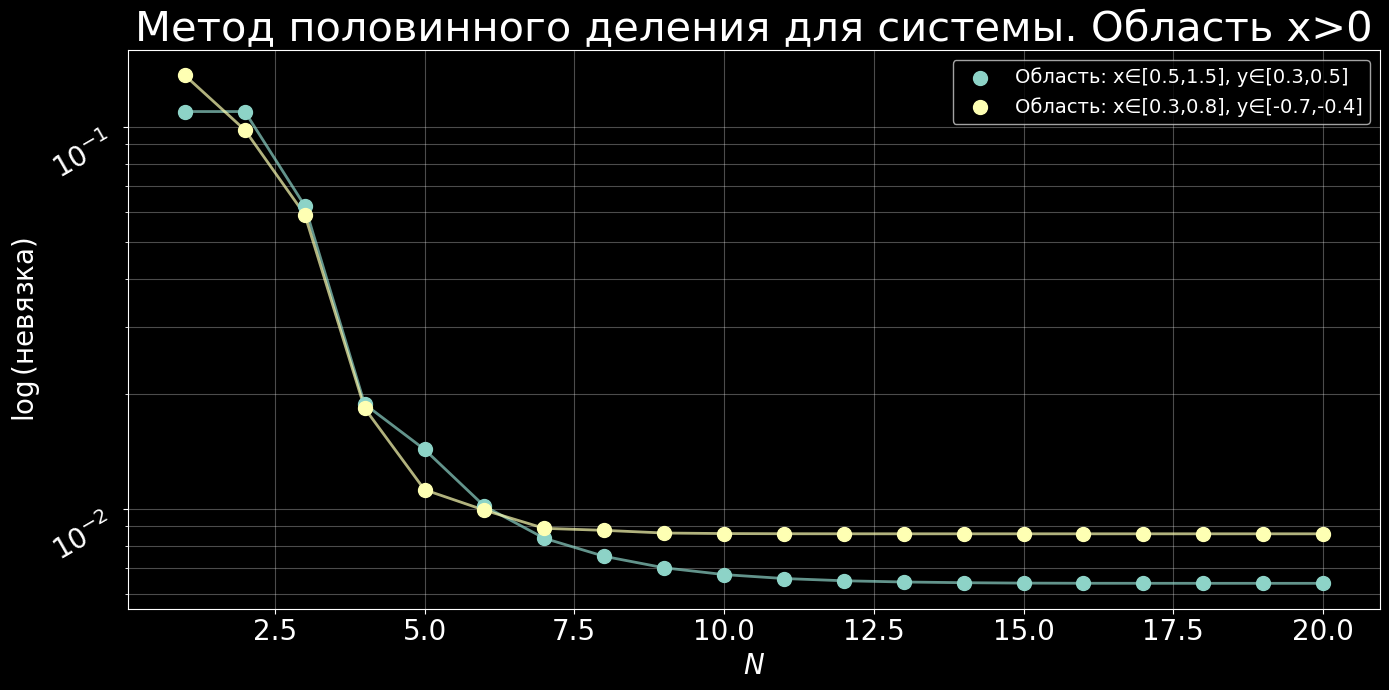

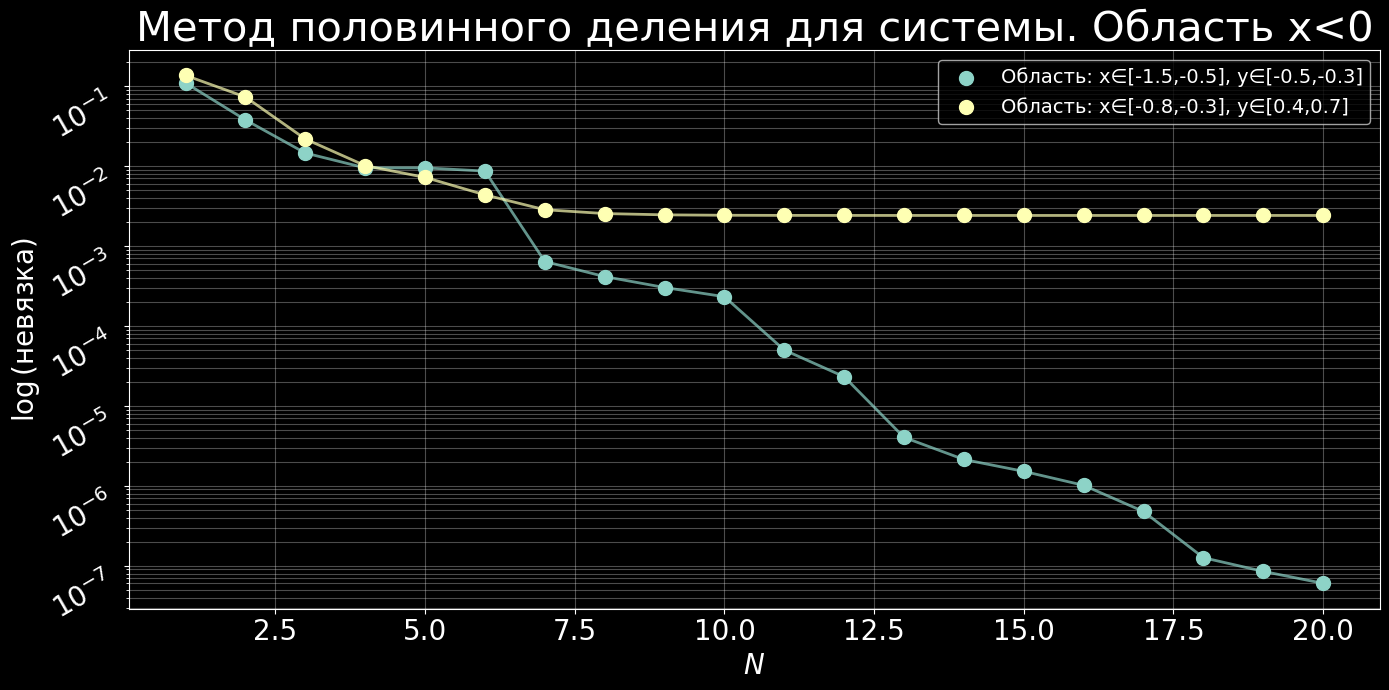

In [26]:
class Bisection_System:
    def __init__(self, f1, f2, n):
        self.f1 = f1
        self.f2 = f2
        self.n = n

    def __call__(self, a_x, b_x, a_y, b_y):
        best_x = (a_x + b_x) / 2
        best_y = (a_y + b_y) / 2
        min_residual = float('inf')

        for i in range(self.n):
            mid_x = (a_x + b_x) / 2
            mid_y = (a_y + b_y) / 2

            points = [
                (a_x, a_y), (mid_x, a_y), (b_x, a_y),
                (a_x, mid_y), (mid_x, mid_y), (b_x, mid_y),
                (a_x, b_y), (mid_x, b_y), (b_x, b_y)
            ]

            for x, y in points:
                residual = np.abs(self.f1(x, y)) + np.abs(self.f2(x, y))
                if residual < min_residual:
                    min_residual = residual
                    best_x, best_y = x, y

            a_x = best_x - (b_x - a_x) / 4
            b_x = best_x + (b_x - a_x) / 4
            a_y = best_y - (b_y - a_y) / 4
            b_y = best_y + (b_y - a_y) / 4

        return best_x, best_y

def f_xy_1(x, y):
    return np.tan(x*y + 0.4) - x**2

def f_xy_2(x, y):
    return 0.6 * x**2 + 2 * y**2 - 1

residuals_system_bisection = []
iterations_system_bisection = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Метод половинного деления для системы. Область x>0", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

residuals = []
for i in range(1, 21):
    bisection = Bisection_System(f_xy_1, f_xy_2, i)
    root_x, root_y = bisection(0.5, 1.5, 0.3, 0.5)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_system_bisection, residuals, s=100,
           label="Область: x∈[0.5,1.5], y∈[0.3,0.5]", zorder=5)
plt.plot(iterations_system_bisection, residuals, linewidth=2, alpha=0.7, zorder=4)

print(f"Область 1 => x: {root_x:.6f}, y: {root_y:.6f}, невязка: {residual:.2e}")

residuals = []
for i in range(1, 21):
    bisection = Bisection_System(f_xy_1, f_xy_2, i)
    root_x, root_y = bisection(0.3, 0.8, -0.7, -0.4)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_system_bisection, residuals, s=100,
           label="Область: x∈[0.3,0.8], y∈[-0.7,-0.4]", zorder=5)
plt.plot(iterations_system_bisection, residuals, linewidth=2, alpha=0.7, zorder=4)

print(f"Область 2 => x: {root_x:.6f}, y: {root_y:.6f}, невязка: {residual:.2e}")

plt.legend(loc="best", fontsize=14)
plt.tight_layout()

plt.figure(figsize=[14, 7])
plt.title("Метод половинного деления для системы. Область x<0", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

residuals = []
for i in range(1, 21):
    bisection = Bisection_System(f_xy_1, f_xy_2, i)
    root_x, root_y = bisection(-1.5, -0.5, -0.5, -0.3)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_system_bisection, residuals, s=100,
           label="Область: x∈[-1.5,-0.5], y∈[-0.5,-0.3]", zorder=5)
plt.plot(iterations_system_bisection, residuals, linewidth=2, alpha=0.7, zorder=4)

print(f"Область 3 => x: {root_x:.6f}, y: {root_y:.6f}, невязка: {residual:.2e}")

residuals = []
for i in range(1, 21):
    bisection = Bisection_System(f_xy_1, f_xy_2, i)
    root_x, root_y = bisection(-0.8, -0.3, 0.4, 0.7)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_system_bisection, residuals, s=100,
           label="Область: x∈[-0.8,-0.3], y∈[0.4,0.7]", zorder=5)
plt.plot(iterations_system_bisection, residuals, linewidth=2, alpha=0.7, zorder=4)

plt.legend(loc="best", fontsize=14)
plt.tight_layout()

print(f"Область 4 => x: {root_x:.6f}, y: {root_y:.6f}, невязка: {residual:.2e}")

### Метод простой итерации для системы
$\begin{align}
    \begin{cases}
        x_{n+1} = \pm\sqrt{\frac{1-2y_{n}^2}{0.6}} \\
        y_{n+1} = \frac{1}{x_n}(\arctan({x_n^2}) - 0.4) \\
    \end{cases}
\end{align}$

- $|\frac{\partial \varphi_1}{\partial x}| \equiv 0$
- $|\frac{\partial \varphi_1}{\partial y}| = \frac{10|y_n|}{3}\sqrt{\frac{0.6}{1-2y_{n}^2}}$
- $|\frac{\partial \varphi_2}{\partial x}| = \left|\frac{2}{1+x_n^4} - \frac{1}{x_n^2}(\arctan((x^2_n) - 0.4))\right|$
- $|\frac{\partial \varphi_2}{\partial y}| \equiv 0$

Данная система имеет 4 попарно симметричных корня, поэтому проверим условия только для одного корня каждой пары.

- $x \in [-0.4, -0.35]$, $y \in [0.65, 0.7]$
- $x \in [1.0, 1.5]$, $y \in [0.4, 0.45]$

Подставив точки из диапазонов, увидим, что $\max{\left(|\frac{\partial \varphi_1}{\partial y}|, |\frac{\partial \varphi_2}{\partial x}|\right)} > 1$ для обоих диапазонов. Это значит, что МПИ не сойдётся гарантированно к какому-либо корню. Однако попробуем воспользоваться им для решения системы.

x_0 = 1, y_0 = 0.4 => x: 1.048392, y: 0.412618
x_0 = 0.4, y_0 = -0.65 => x: 1.048487, y: 0.412667
x_0 = -1, y_0 = -0.4 => x: -1.048392, y: -0.412618
x_0 = -0.4, y_0 = 0.65 => x: -1.048487, y: -0.412667


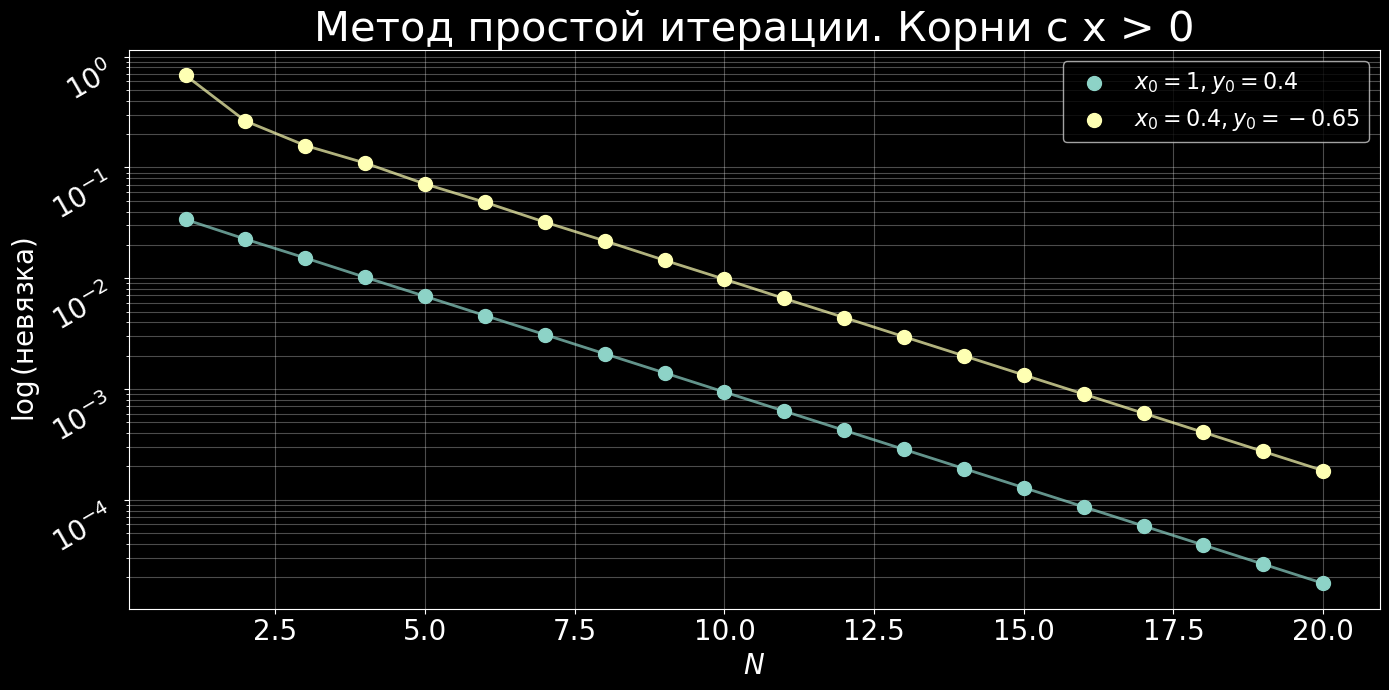

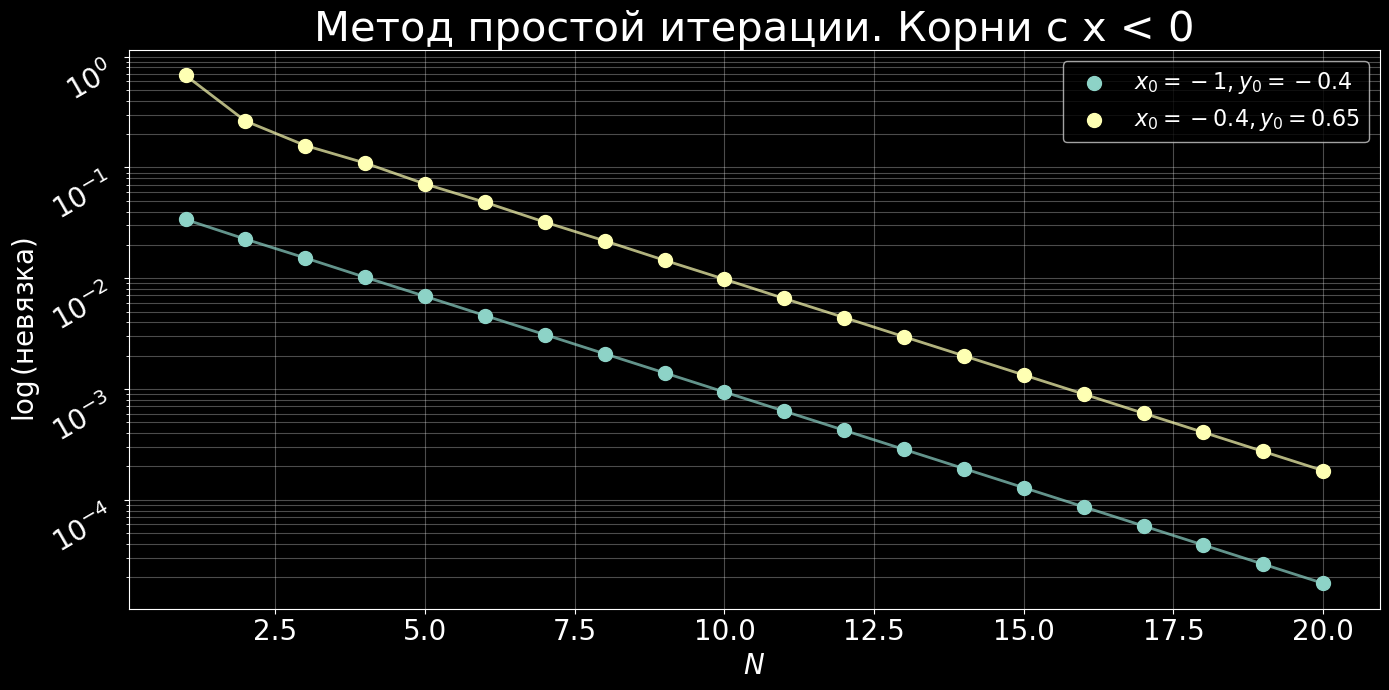

In [27]:
def f_x_1(y):
    return np.sqrt((1 - 2 * y**2) / 0.6)

def f_x_2(y):
    return -np.sqrt((1 - 2 * y**2) / 0.6)

def f_y(x):
    return (np.arctan(x**2) - 0.4) / x

class Fixed_Point_Iteration_System:
    def __init__(self, f_x, f_y, n):
        self.f_x = f_x
        self.f_y = f_y
        self.n = n

    def __call__(self, x_0, y_0):
        x = x_0
        y = y_0
        for i in range(self.n):
            x = self.f_x(y)
            y = self.f_y(x)
        return x, y

residuals_fpis = []
iterations_fpis = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Метод простой итерации. Корни с x > 0", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

residuals = []
for i in range(1, iterations_fpis.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_1, f_y, i)
    root_x, root_y = fpis(1, 0.4)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_fpis, residuals, s=100, label="$x_0 = 1, y_0 = 0.4$", zorder=5)
plt.plot(iterations_fpis, residuals, linewidth=2, alpha=0.7, zorder=4)

print(f"x_0 = 1, y_0 = 0.4 => x: {root_x:.6f}, y: {root_y:.6f}")

residuals = []
for i in range(1, iterations_fpis.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_1, f_y, i)
    root_x, root_y = fpis(0.4, -0.65)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_fpis, residuals, s=100, label="$x_0 = 0.4, y_0 = -0.65$", zorder=5)
plt.plot(iterations_fpis, residuals, linewidth=2, alpha=0.7, zorder=4)

plt.legend(loc="best", fontsize=16)
plt.tight_layout()

print(f"x_0 = 0.4, y_0 = -0.65 => x: {root_x:.6f}, y: {root_y:.6f}")

plt.figure(figsize=[14, 7])
plt.title("Метод простой итерации. Корни с x < 0", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

residuals = []
for i in range(1, iterations_fpis.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_2, f_y, i)
    root_x, root_y = fpis(-1, -0.4)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_fpis, residuals, s=100, label="$x_0 = -1, y_0 = -0.4$", zorder=5)
plt.plot(iterations_fpis, residuals, linewidth=2, alpha=0.7, zorder=4)

print(f"x_0 = -1, y_0 = -0.4 => x: {root_x:.6f}, y: {root_y:.6f}")

residuals = []
for i in range(1, iterations_fpis.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_2, f_y, i)
    root_x, root_y = fpis(-0.4, 0.65)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_fpis, residuals, s=100, label="$x_0 = -0.4, y_0 = 0.65$", zorder=5)
plt.plot(iterations_fpis, residuals, linewidth=2, alpha=0.7, zorder=4)

plt.legend(loc="best", fontsize=16)
plt.tight_layout()

print(f"x_0 = -0.4, y_0 = 0.65 => x: {root_x:.6f}, y: {root_y:.6f}")

### Метод Ньютона
$\bar x_{n+1} = \bar x_n - J^{-1} \cdot \bar f(x_n)$

x_0 = 1, y_0 = 0.4 => x: 1.048400, y: 0.412622
x_0 = 0.4, y_0 = -0.65 => x: 0.379848, y: -0.675807
x_0 = -1, y_0 = -0.4 => x: -1.048400, y: -0.412622
x_0 = -0.4, y_0 = 0.65 => x: -0.379848, y: 0.675807


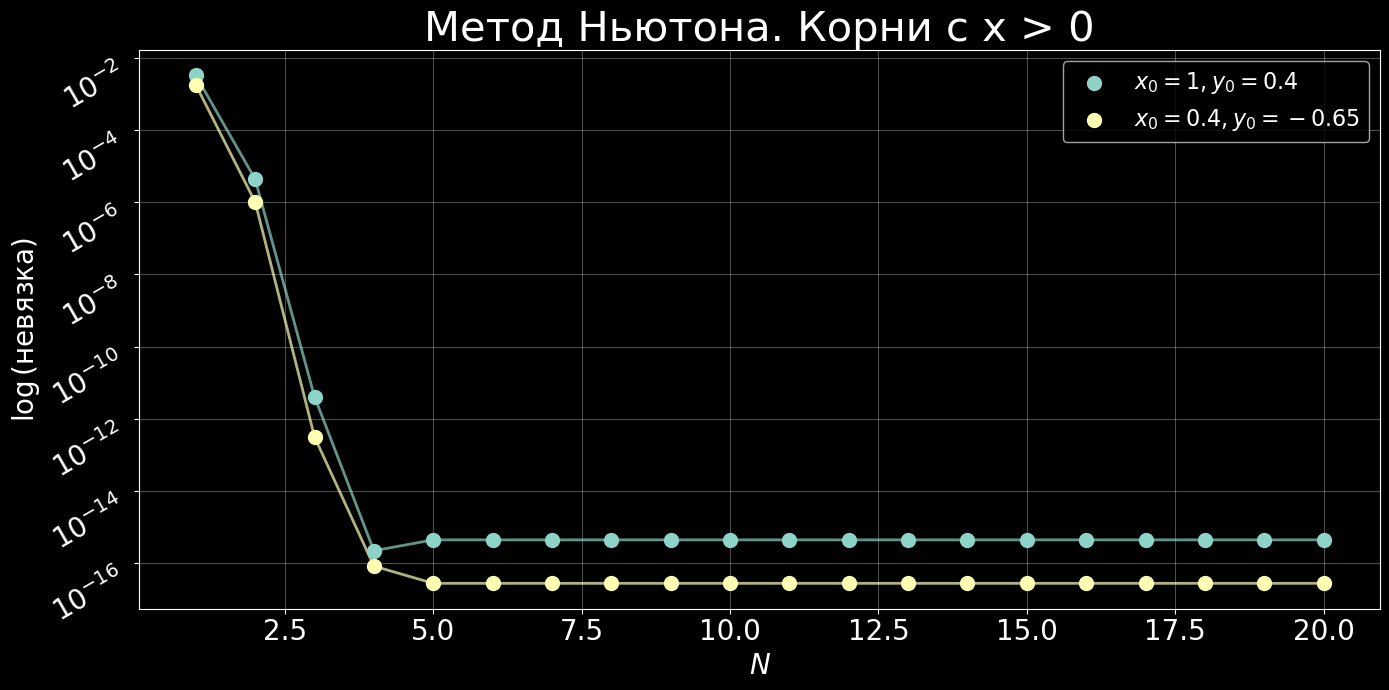

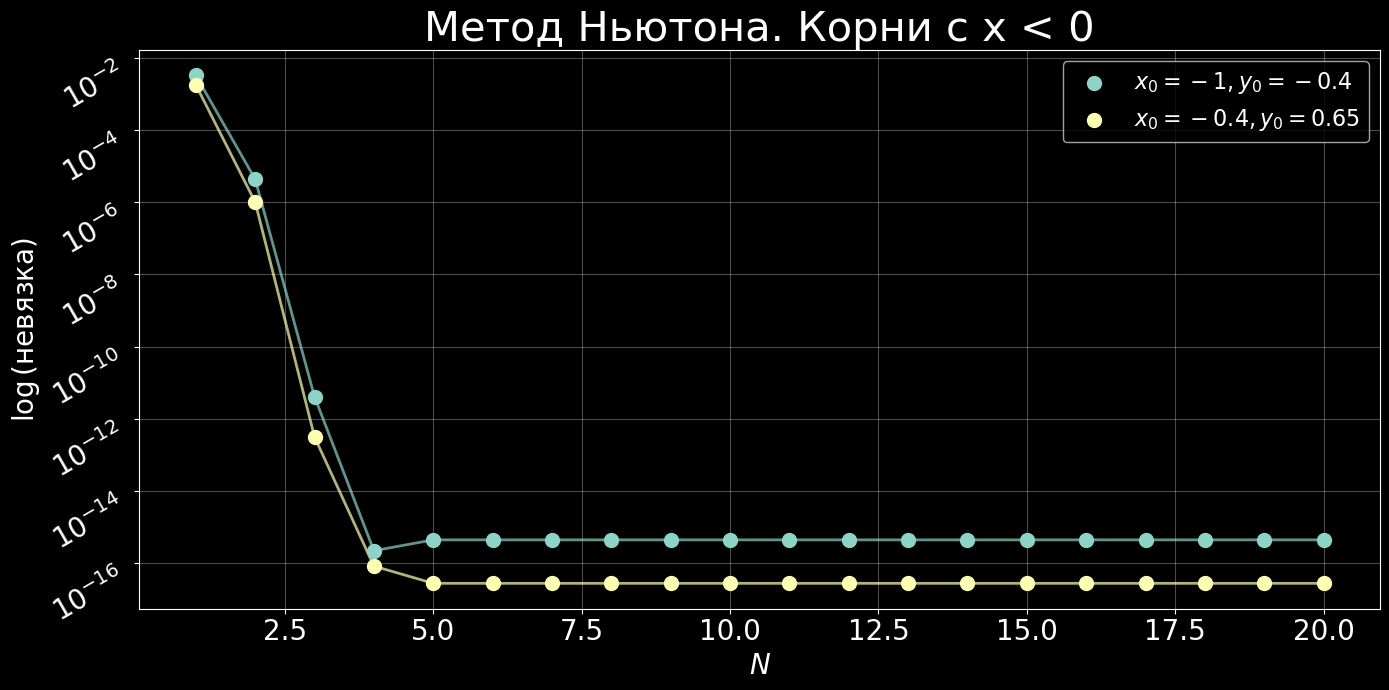

In [28]:
def num_deriv_x(f, x, y, h):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def num_deriv_y(f, x, y, h):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

class Newton_System:
    def __init__(self, f_x, f_y, n):
        self.f_xy_1 = f_xy_1
        self.f_xy_2 = f_xy_2
        self.n = n

    def __call__(self, x_0, y_0):
        x = x_0
        y = y_0

        for i in range(self.n):
            J = np.zeros((2, 2))
            J[0, 0] = num_deriv_x(self.f_xy_1, x, y, 1e-6)
            J[0, 1] = num_deriv_y(self.f_xy_1, x, y, 1e-6)
            J[1, 0] = num_deriv_x(self.f_xy_2, x, y, 1e-6)
            J[1, 1] = num_deriv_y(self.f_xy_2, x, y, 1e-6)

            J_inv = np.linalg.inv(J)

            F = np.array([self.f_xy_1(x, y), self.f_xy_2(x, y)])

            step = J_inv @ F

            x -= step[0]
            y -= step[1]

        return x, y

residuals_newton_sys = []
iterations_newton_sys = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Метод Ньютона. Корни с x > 0", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

residuals = []
for i in range(1, iterations_newton_sys.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(1, 0.4)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_newton_sys, residuals, s=100, label="$x_0 = 1, y_0 = 0.4$", zorder=5)
plt.plot(iterations_newton_sys, residuals, linewidth=2, alpha=0.7, zorder=4)

print(f"x_0 = 1, y_0 = 0.4 => x: {root_x:.6f}, y: {root_y:.6f}")

residuals = []
for i in range(1, iterations_newton_sys.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(0.4, -0.65)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_newton_sys, residuals, s=100, label="$x_0 = 0.4, y_0 = -0.65$", zorder=5)
plt.plot(iterations_newton_sys, residuals, linewidth=2, alpha=0.7, zorder=4)

plt.legend(loc="best", fontsize=16)
plt.tight_layout()

print(f"x_0 = 0.4, y_0 = -0.65 => x: {root_x:.6f}, y: {root_y:.6f}")

plt.figure(figsize=[14, 7])
plt.title("Метод Ньютона. Корни с x < 0", fontsize=30)

plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

residuals = []
for i in range(1, iterations_newton_sys.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(-1, -0.4)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_newton_sys, residuals, s=100, label="$x_0 = -1, y_0 = -0.4$", zorder=5)
plt.plot(iterations_newton_sys, residuals, linewidth=2, alpha=0.7, zorder=4)

print(f"x_0 = -1, y_0 = -0.4 => x: {root_x:.6f}, y: {root_y:.6f}")

residuals = []
for i in range(1, iterations_newton_sys.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(-0.4, 0.65)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_newton_sys, residuals, s=100, label="$x_0 = -0.4, y_0 = 0.65$", zorder=5)
plt.plot(iterations_newton_sys, residuals, linewidth=2, alpha=0.7, zorder=4)

plt.legend(loc="best", fontsize=16)
plt.tight_layout()

print(f"x_0 = -0.4, y_0 = 0.65 => x: {root_x:.6f}, y: {root_y:.6f}")

### Модифицрованный метод Ньютона
$\bar x_{n+1} = \bar x_n - J^{-1}(x_0) \cdot \bar f(x_n)$

x_0 = 1, y_0 = 0.4 => x: 1.048400, y: 0.412622
x_0 = 0.4, y_0 = -0.65 => x: 0.379848, y: -0.675807
x_0 = -1, y_0 = -0.4 => x: -1.048400, y: -0.412622
x_0 = -0.4, y_0 = 0.65 => x: -0.379848, y: 0.675807


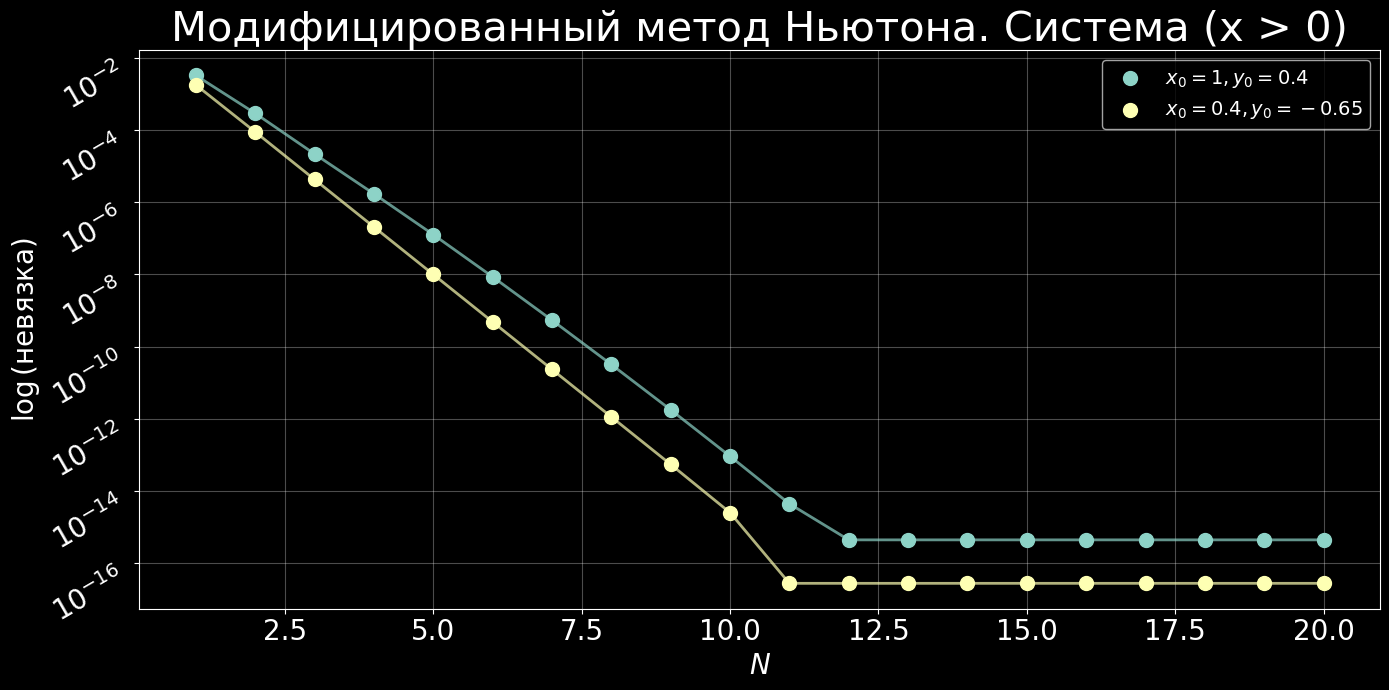

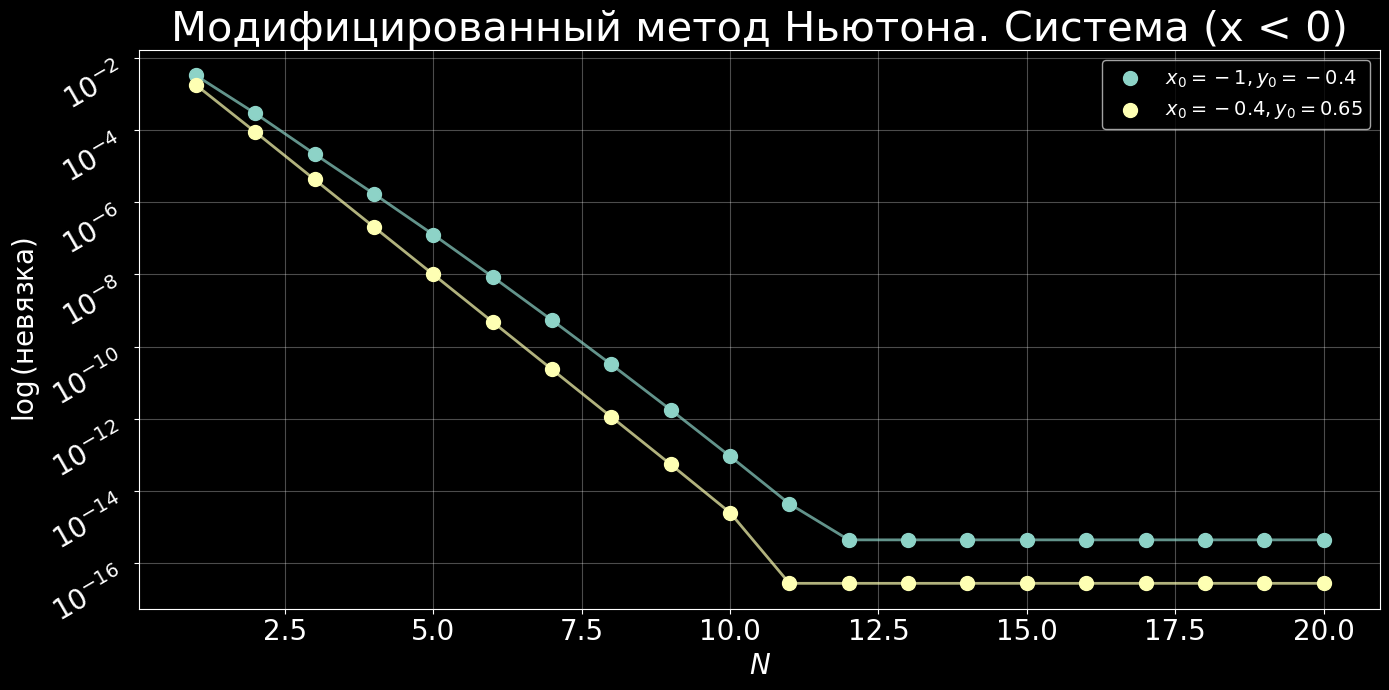

In [29]:
def f_xy_1(x, y):
    return np.tan(x*y + 0.4) - x**2

def f_xy_2(x, y):
    return 0.6 * x**2 + 2 * y**2 - 1

def num_deriv_x(f, x, y, h=1e-6):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def num_deriv_y(f, x, y, h=1e-6):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

class ModifiedNewtonTangent_System:
    def __init__(self, f1, f2, n):
        self.f1 = f1
        self.f2 = f2
        self.n = n

    def __call__(self, x0, y0):
        J0 = np.zeros((2, 2))
        J0[0, 0] = num_deriv_x(self.f1, x0, y0)
        J0[0, 1] = num_deriv_y(self.f1, x0, y0)
        J0[1, 0] = num_deriv_x(self.f2, x0, y0)
        J0[1, 1] = num_deriv_y(self.f2, x0, y0)

        J0_inv = np.linalg.inv(J0)
        x, y = x0, y0

        for i in range(self.n):
            F = np.array([self.f1(x, y), self.f2(x, y)])
            delta = J0_inv @ F
            x -= delta[0]
            y -= delta[1]

        return x, y

residuals_mod_newton_sys_pos = []
iterations_mod_newton_sys = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Модифицированный метод Ньютона. Система (x > 0)", fontsize=30)
plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

residuals = []
for i in range(1, iterations_mod_newton_sys.size + 1):
    mod_newton_sys = ModifiedNewtonTangent_System(f_xy_1, f_xy_2, i)
    root_x, root_y = mod_newton_sys(1, 0.4)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_mod_newton_sys, residuals, s=100,
           label="$x_0 = 1, y_0 = 0.4$", zorder=5)
plt.plot(iterations_mod_newton_sys, residuals, linewidth=2, alpha=0.7, zorder=4)
print(f"x_0 = 1, y_0 = 0.4 => x: {root_x:.6f}, y: {root_y:.6f}")

residuals = []
for i in range(1, iterations_mod_newton_sys.size + 1):
    mod_newton_sys = ModifiedNewtonTangent_System(f_xy_1, f_xy_2, i)
    root_x, root_y = mod_newton_sys(0.4, -0.65)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_mod_newton_sys, residuals, s=100,
           label="$x_0 = 0.4, y_0 = -0.65$", zorder=5)
plt.plot(iterations_mod_newton_sys, residuals, linewidth=2, alpha=0.7, zorder=4)
plt.legend(loc="best", fontsize=14)
plt.tight_layout()
print(f"x_0 = 0.4, y_0 = -0.65 => x: {root_x:.6f}, y: {root_y:.6f}")

plt.figure(figsize=[14, 7])
plt.title("Модифицированный метод Ньютона. Система (x < 0)", fontsize=30)
plt.yscale("log")
plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")
plt.ylabel("$\\log{(\\text{невязка})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
plt.grid(which="both", alpha=0.3)

residuals = []
for i in range(1, iterations_mod_newton_sys.size + 1):
    mod_newton_sys = ModifiedNewtonTangent_System(f_xy_1, f_xy_2, i)
    root_x, root_y = mod_newton_sys(-1, -0.4)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_mod_newton_sys, residuals, s=100,
           label="$x_0 = -1, y_0 = -0.4$", zorder=5)
plt.plot(iterations_mod_newton_sys, residuals, linewidth=2, alpha=0.7, zorder=4)
print(f"x_0 = -1, y_0 = -0.4 => x: {root_x:.6f}, y: {root_y:.6f}")

residuals = []
for i in range(1, iterations_mod_newton_sys.size + 1):
    mod_newton_sys = ModifiedNewtonTangent_System(f_xy_1, f_xy_2, i)
    root_x, root_y = mod_newton_sys(-0.4, 0.65)
    residual = np.abs(f_xy_1(root_x, root_y)) + np.abs(f_xy_2(root_x, root_y))
    residuals.append(residual)

plt.scatter(iterations_mod_newton_sys, residuals, s=100,
           label="$x_0 = -0.4, y_0 = 0.65$", zorder=5)
plt.plot(iterations_mod_newton_sys, residuals, linewidth=2, alpha=0.7, zorder=4)
plt.legend(loc="best", fontsize=14)
plt.tight_layout()
print(f"x_0 = -0.4, y_0 = 0.65 => x: {root_x:.6f}, y: {root_y:.6f}")